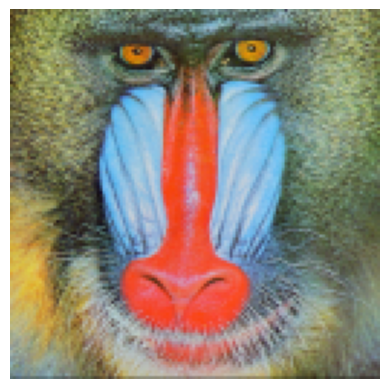

In [110]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
image1 = cv2.imread('Untitled.png')
image = image1;
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
height, width, channels = image1.shape
plt.imshow(image1) 
plt.axis('off')
plt.show()

In [111]:
message = "hello"
def text_to_binary(message):
    return ''.join(format(ord(char), '08b') for char in message)
binMessage = text_to_binary(message)
print(binMessage)

0110100001100101011011000110110001101111


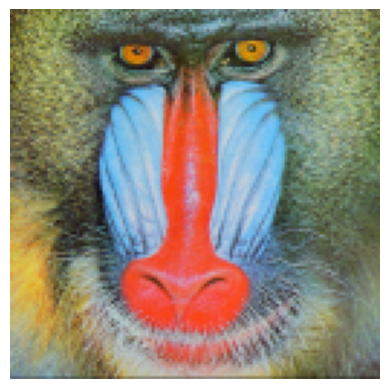

In [106]:
def embedMessageInImage(image, message):
    index = 0
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]
            for channel in range(channels):
                if(index < len(message)):
                    pixel[channel] = pixel[channel] & ~1 | int(message[index])
                    index += 1
    return image
image1 = embedMessageInImage(image1, binMessage)
cv2.imwrite('Untitled2.png', image1)
plt.imshow(image1) 
plt.axis('off')
plt.show()


Message hidden successfully.


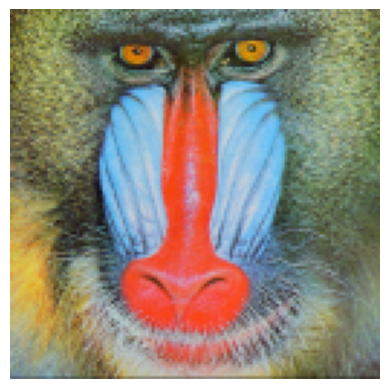

In [107]:
from PIL import Image
def hide_text_in_image(input_image_path, message):
    try:
        # Open the image
        image = Image.open(input_image_path)

        # Convert the message to binary
        binary_message = ''.join(format(ord(char), '08b') for char in message)

        if len(binary_message) > (image.width * image.height * 3):
            raise ValueError("Message is too large to hide in the image")

        data_index = 0

        # Iterate through the image pixels
        for x in range(image.width):
            for y in range(image.height):
                pixel = list(image.getpixel((x, y)))

                # Iterate through the RGB channels (3 channels per pixel)
                for color_channel in range(3):
                    if data_index < len(binary_message):
                        pixel[color_channel] = pixel[color_channel] & ~1 | int(binary_message[data_index])
                        data_index += 1

                image.putpixel((x, y), tuple(pixel))

        # Save the modified image with the hidden message
        image.save("Untitled3.png")
        print("Message hidden successfully.")
        return image
    except Exception as e:
        print(f"Error: {e}")
        
image2 = hide_text_in_image('Untitled.png', "hello")
plt.imshow(image2) 
plt.axis('off')
plt.show()

In [109]:
def compare(image1, image2):
    for y in range(height):
            for x in range(width):
                pixel1 = image1[y, x]
                pixel2 = list(image2.getpixel((x, y)))
                pixel1 = np.array(pixel1)
                pixel2 = np.array(pixel2[:3])
                if(not(np.array_equal(pixel1, pixel2))):
                    return False
    return True
compare(image1, image2)

True